In [1]:
import heartpy as hp
from scipy.io import loadmat,savemat
from scipy import signal
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import os
def calucate_hr(ppgsignal):
    Nfft=4096
    srate=125   
    # HRrange=np.arange(round(1*Nfft/srate),round(4*Nfft/srate)+2)
    # psd=1/len(signal)*fft(signal,Nfft)**2
    wd, m = hp.process(ppgsignal, sample_rate = srate)
    # print('bpm:{} tpye:{} isnan:{}'.format(m['bpm'],type(m['bpm']),math.isnan(m['bpm'])))
    return m['bpm']
    # max_peak=np.where(signal==max(signal))
    # bpm=self.Loc2BPM(max_peak[0]+1,srate,Nfft)
    # return bpm
def divide_ppg(signal,length,overlap):
    totalnum=len(signal)/length
    pass

currnent bpm:67.49156355455568
after resample,currnent bpm:141.06583072100315


/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2233: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

"\nNfft=4096\nsrate=250  \nwd, m = hp.process(signal, sample_rate = srate)   \nprint( m['bpm'])\n"

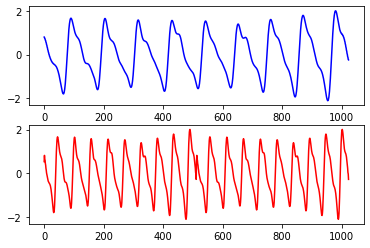

In [2]:
####################################
# resample segment length at 1024
###################################
##############################
#  increase the frquency 
##############################
signalpath='./data/500.mat'
ppgsignal=loadmat(signalpath)
ppgsignal=ppgsignal['ppgseg']
ppgsignal=ppgsignal[0]
ppgsignal=preprocessing.scale(ppgsignal)
ppgsignal=signal.resample(ppgsignal,1024)
bpm=calucate_hr(ppgsignal)
print('currnent bpm:{}'.format(bpm))
###########################################
# resmaple  and plot
##########################################
resamplesignal=signal.resample(ppgsignal,512)
# print(resamplesignal.shape)
newsignal=np.concatenate((resamplesignal,resamplesignal))
# print(newsignal.shape)
plt.subplot(211)
plt.plot(ppgsignal,'b')
plt.subplot(212)
plt.plot(newsignal,'r')
bpm=calucate_hr(newsignal)
print('after resample,currnent bpm:{}'.format(bpm))


'''
Nfft=4096
srate=250  
wd, m = hp.process(signal, sample_rate = srate)   
print( m['bpm'])
'''

currnent bpm:69.12442396313364
after resample,currnent bpm:144.53961456102783


/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

"\nNfft=4096\nsrate=250  \nwd, m = hp.process(signal, sample_rate = srate)   \nprint( m['bpm'])\n"

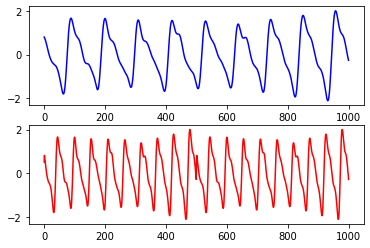

In [3]:
##############################
#  increase the frquency
##############################
signalpath='./data/500.mat'
ppgsignal=loadmat(signalpath)
ppgsignal=ppgsignal['ppgseg']
ppgsignal=ppgsignal[0]
ppgsignal=preprocessing.scale(ppgsignal)
# ppgsignal=signal.resample(ppgsignal,1024)
bpm=calucate_hr(ppgsignal)
print('currnent bpm:{}'.format(bpm))
###########################################
# resmaple  and plot
##########################################
resamplesignal=signal.resample(ppgsignal,500)
# print(resamplesignal.shape)
newsignal=np.concatenate((resamplesignal,resamplesignal))
# print(newsignal.shape)
plt.subplot(211)
plt.plot(ppgsignal,'b')
plt.subplot(212)
plt.plot(newsignal,'r')
bpm=calucate_hr(newsignal)
print('after resample,currnent bpm:{}'.format(bpm))


'''
Nfft=4096
srate=250  
wd, m = hp.process(signal, sample_rate = srate)   
print( m['bpm'])
'''

In [6]:
###############################
# generate resample data in total folder
##############################
datapath='./data'
datas=os.listdir(datapath)
totalfiles=[os.path.join(datapath,data) for data in datas]
######################################
# calculate bpm for every signal pppg
#####################################
for signalpath in totalfiles:
#     print(signalpath)
    slices=signalpath.split('/')
#     print(slices)
    num=slices[2][:-4]
    num=int(num)+768
#     print(num)
    ppgsignal=loadmat(signalpath)
    ppgsignal=ppgsignal['ppgseg']
    ppgsignal=ppgsignal[0]
    ppgsignal=preprocessing.scale(ppgsignal)
    bpm=calucate_hr(ppgsignal)
    resamplesignal=signal.resample(ppgsignal,500)
    print('currnent bpm:{}'.format(bpm))
    newsignal=np.concatenate((resamplesignal,resamplesignal))
#     print(newsignal.shape)
    ppgseg=newsignal
    newbpm=calucate_hr(newsignal)
    savemat('./sampledata/'+str(num) +'.mat',{'ppgseg':ppgseg})
    
    print('after resample currnent bpm:{}'.format(newbpm))
#     break

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:78.28810020876827
after resample currnent bpm:156.97674418604652
currnent bpm:71.5042372881356
after resample currnent bpm:146.75592173017506
currnent bpm:64.81481481481482
after resample currnent bpm:132.4503311258278
currnent bpm:68.1044267877412
after resample currnent bpm:135.59322033898306
currnent bpm:67.79661016949153
after resample currnent bpm:135.20678685047722
currnent bpm:81.62031438935914
after resample currnent bpm:164.11378555798686
currnent bpm:74.83370288248337
after resample currnent bpm:149.84227129337538
currnent bpm:70.01166861143524
after resample currnent bpm:137.24434876210978
currnent bpm:66.96428571428571
after resample currnent bpm:134.52914798206277
currnent bpm:85.22727272727273
after resample currnent bpm:167.73162939297123
currnent bpm:68.25938566552901
after resample currnent bpm:135.63829787234042
currnent bpm:67.11409395973155
after resample currnent bpm:134.77801268498942
currnent bpm:74.34944237918215
after resample currnent bpm:149.5016

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:82.14676889375684
after resample currnent bpm:164.7489539748954
currnent bpm:77.14285714285714
after resample currnent bpm:160.08537886872998
currnent bpm:66.3716814159292
after resample currnent bpm:134.06940063091483
currnent bpm:70.17543859649123
after resample currnent bpm:137.39224137931035
currnent bpm:82.59911894273128
after resample currnent bpm:165.0943396226415
currnent bpm:69.04487917146145
after resample currnent bpm:144.53961456102783
currnent bpm:72.19251336898395
after resample currnent bpm:147.36297828335057
currnent bpm:74.66814159292035
after resample currnent bpm:149.52780692549842
currnent bpm:79.61783439490446
after resample currnent bpm:162.20391349124614
currnent bpm:70.2576112412178
after resample currnent bpm:145.78833693304537
currnent bpm:71.05263157894737
after resample currnent bpm:145.85465711361311
currnent bpm:67.72009029345372
after resample currnent bpm:134.52914798206277
currnent bpm:69.58762886597938
after resample currnent bpm:139.37282

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:67.56756756756756
after resample currnent bpm:135.20678685047722
currnent bpm:71.8849840255591
after resample currnent bpm:147.05882352941177
currnent bpm:72.73706896551724
after resample currnent bpm:146.57980456026058
currnent bpm:67.49156355455568
after resample currnent bpm:135.06355932203388
currnent bpm:70.17543859649123
after resample currnent bpm:145.63106796116506
currnent bpm:73.60959651035986
after resample currnent bpm:148.7473903966597
currnent bpm:71.51370679380214
after resample currnent bpm:146.89880304679
currnent bpm:66.2251655629139
after resample currnent bpm:133.92857142857142
currnent bpm:70.75471698113208
after resample currnent bpm:146.57980456026058
currnent bpm:79.22535211267605
after resample currnent bpm:161.81229773462783
currnent bpm:68.88633754305395
after resample currnent bpm:144.3850267379679
currnent bpm:72.11538461538461
after resample currnent bpm:147.36297828335057
currnent bpm:69.28406466512702
after resample currnent bpm:136.65594855

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:69.20415224913495
after resample currnent bpm:144.53961456102783
currnent bpm:77.49712973593572
after resample currnent bpm:160.25641025641028
currnent bpm:66.3716814159292
after resample currnent bpm:133.92857142857142
currnent bpm:69.76744186046511
after resample currnent bpm:145.16129032258064
currnent bpm:68.80733944954129
after resample currnent bpm:136.0725720384205
currnent bpm:75.16703786191538
after resample currnent bpm:150.0
currnent bpm:68.41505131128848
after resample currnent bpm:135.78274760383385
currnent bpm:82.05689277899343
after resample currnent bpm:164.576802507837
currnent bpm:71.77033492822966
after resample currnent bpm:147.05882352941177
currnent bpm:86.40552995391705
after resample currnent bpm:176.65952890792292
currnent bpm:76.61748013620885
after resample currnent bpm:151.4346439957492
currnent bpm:66.44518272425249
after resample currnent bpm:133.92857142857142
currnent bpm:66.07929515418502
after resample currnent bpm:133.64779874213838
curr

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:74.17582417582418
after resample currnent bpm:149.21465968586386
currnent bpm:76.70454545454545
after resample currnent bpm:151.59574468085106
currnent bpm:73.28990228013029
after resample currnent bpm:148.28303850156087
currnent bpm:72.65877287405812
after resample currnent bpm:148.0263157894737
currnent bpm:68.96551724137932
after resample currnent bpm:136.2088535754824
currnent bpm:65.93406593406593
after resample currnent bpm:133.50785340314135
currnent bpm:75.84269662921349
after resample currnent bpm:158.73015873015873
currnent bpm:77.1604938271605
after resample currnent bpm:155.5299539170507
currnent bpm:75.58790593505039
after resample currnent bpm:158.56236786469344
currnent bpm:65.50218340611353
after resample currnent bpm:132.95099061522419
currnent bpm:71.09004739336493
after resample currnent bpm:138.28633405639914
currnent bpm:69.20415224913495
after resample currnent bpm:136.50963597430408
currnent bpm:67.0391061452514
after resample currnent bpm:134.635691

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:73.26007326007326
after resample currnent bpm:148.35164835164835
currnent bpm:68.3371298405467
after resample currnent bpm:135.63829787234042
currnent bpm:84.7457627118644
after resample currnent bpm:174.97348886532342
currnent bpm:77.39938080495355
after resample currnent bpm:154.8165137614679
currnent bpm:73.98273736128236
after resample currnent bpm:149.17127071823205
currnent bpm:71.27771911298838
after resample currnent bpm:146.45426515930114
currnent bpm:73.60959651035986
after resample currnent bpm:148.7473903966597
currnent bpm:76.09921082299887
after resample currnent bpm:150.95338983050848
currnent bpm:71.656050955414
after resample currnent bpm:147.05882352941177
currnent bpm:75.25083612040133
after resample currnent bpm:150.66964285714286
currnent bpm:73.28990228013029
after resample currnent bpm:148.5148514851485
currnent bpm:68.72852233676976
after resample currnent bpm:136.0725720384205
currnent bpm:67.49156355455568
after resample currnent bpm:134.920634920

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:85.32423208191126
after resample currnent bpm:167.73162939297123
currnent bpm:65.21739130434783
after resample currnent bpm:133.03769401330376
currnent bpm:75.33482142857143
after resample currnent bpm:150.0
currnent bpm:67.11409395973155
after resample currnent bpm:134.8314606741573
currnent bpm:76.27118644067797
after resample currnent bpm:151.27388535031847
currnent bpm:71.73219978746015
after resample currnent bpm:146.90721649484536
currnent bpm:75.28230865746549
after resample currnent bpm:150.16685205784205
currnent bpm:76.87927107061503
after resample currnent bpm:151.75718849840257
currnent bpm:69.04487917146145
after resample currnent bpm:136.36363636363637
currnent bpm:81.78844056706652
after resample currnent bpm:164.576802507837
currnent bpm:71.05263157894737
after resample currnent bpm:146.26218851570965
currnent bpm:73.52941176470588
after resample currnent bpm:148.6784140969163
currnent bpm:86.02711157455683
after resample currnent bpm:176.2002042900919
curr

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:66.66666666666667
after resample currnent bpm:134.0782122905028
currnent bpm:79.95735607675907
after resample currnent bpm:162.53869969040247
currnent bpm:64.25948592411261
after resample currnent bpm:132.15859030837004
currnent bpm:79.69303423848878
after resample currnent bpm:162.51354279523295
currnent bpm:73.68995633187774
after resample currnent bpm:148.7473903966597
currnent bpm:73.43941248470013
after resample currnent bpm:148.6784140969163
currnent bpm:67.64374295377678
after resample currnent bpm:134.98312710911136
currnent bpm:79.69303423848878
after resample currnent bpm:162.51354279523295
currnent bpm:65.78947368421052
after resample currnent bpm:133.48164627363738
currnent bpm:64.44683136412459
after resample currnent bpm:131.85108583247157
currnent bpm:67.79661016949153
after resample currnent bpm:135.20678685047722
currnent bpm:69.60556844547564
after resample currnent bpm:137.09677419354838
currnent bpm:70.83825265643448
after resample currnent bpm:138.1365

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:67.95016987542469
after resample currnent bpm:135.35031847133757
currnent bpm:74.66814159292035
after resample currnent bpm:149.83351831298557
currnent bpm:69.44444444444444
after resample currnent bpm:136.65594855305466
currnent bpm:76.01351351351352
after resample currnent bpm:150.16685205784205
currnent bpm:67.49156355455568
after resample currnent bpm:134.92063492063494
currnent bpm:67.95016987542469
after resample currnent bpm:135.59322033898306
currnent bpm:71.42857142857143
after resample currnent bpm:146.89880304679
currnent bpm:70.58823529411765
after resample currnent bpm:137.83783783783784
currnent bpm:71.25890736342043
after resample currnent bpm:146.7391304347826
currnent bpm:65.78947368421052
after resample currnent bpm:133.630289532294
currnent bpm:76.44394110985277
after resample currnent bpm:159.23566878980893
currnent bpm:70.75471698113208
after resample currnent bpm:146.1038961038961
currnent bpm:66.59267480577137
after resample currnent bpm:134.21052631

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:67.56756756756756
after resample currnent bpm:135.06355932203388
currnent bpm:66.07929515418502
after resample currnent bpm:133.33333333333334
currnent bpm:65.05576208178438
after resample currnent bpm:132.89036544850498
currnent bpm:68.18181818181819
after resample currnent bpm:135.4941551540914
currnent bpm:73.61963190184049
after resample currnent bpm:148.6784140969163
currnent bpm:71.94244604316546
after resample currnent bpm:147.21919302071973
currnent bpm:64.37768240343348
after resample currnent bpm:131.98757763975155
currnent bpm:69.04487917146145
after resample currnent bpm:136.36363636363637
currnent bpm:80.73196986006458
after resample currnent bpm:163.38174273858922
currnent bpm:69.84866123399301
after resample currnent bpm:137.09677419354838
currnent bpm:76.92307692307692
after resample currnent bpm:159.91471215351814
currnent bpm:72.97297297297298
after resample currnent bpm:148.12889812889813
currnent bpm:63.63636363636363
after resample currnent bpm:131.434

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

after resample currnent bpm:146.57980456026058
currnent bpm:71.77033492822966
after resample currnent bpm:147.05882352941177
currnent bpm:68.1044267877412
after resample currnent bpm:135.63829787234042
currnent bpm:70.4225352112676
after resample currnent bpm:137.6889848812095
currnent bpm:81.43322475570034
after resample currnent bpm:164.0625
currnent bpm:77.23995880535531
after resample currnent bpm:152.24358974358975
currnent bpm:67.79661016949153
after resample currnent bpm:134.3784994400896
currnent bpm:70.09345794392523
after resample currnent bpm:137.39224137931035
currnent bpm:70.09345794392523
after resample currnent bpm:145.78833693304537
currnent bpm:67.0391061452514
after resample currnent bpm:134.63569165786694
currnent bpm:78.85514018691589
after resample currnent bpm:161.63793103448276
currnent bpm:66.53992395437263
after resample currnent bpm:134.2281879194631
currnent bpm:89.49880668257757
after resample currnent bpm:179.5429815016322
currnent bpm:71.05263157894737
aft

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:69.01840490797545
after resample currnent bpm:144.69453376205786
currnent bpm:84.55467869222096
after resample currnent bpm:166.84322033898306
currnent bpm:67.79661016949153
after resample currnent bpm:135.35031847133757
currnent bpm:72.02881152460985
after resample currnent bpm:147.37991266375548
currnent bpm:67.0391061452514
after resample currnent bpm:134.63569165786694
currnent bpm:75.37688442211055
after resample currnent bpm:150.33407572383075
currnent bpm:83.70535714285715
after resample currnent bpm:166.13924050632912
currnent bpm:82.9646017699115
after resample currnent bpm:164.65422612513723
currnent bpm:70.4225352112676
after resample currnent bpm:137.83783783783784
currnent bpm:65.86169045005488
after resample currnent bpm:133.36820083682008
currnent bpm:73.3695652173913
after resample currnent bpm:148.59228362878
currnent bpm:64.56241032998565
after resample currnent bpm:136.2179487179487
currnent bpm:72.89416846652269
after resample currnent bpm:147.975077881

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

after resample currnent bpm:143.312101910828
currnent bpm:70.90336134453781
after resample currnent bpm:146.15384615384616
currnent bpm:67.72009029345372
after resample currnent bpm:134.98312710911136
currnent bpm:66.88963210702342
after resample currnent bpm:134.35194942044257
currnent bpm:65.50218340611353
after resample currnent bpm:133.08977035490605
currnent bpm:70.58823529411765
after resample currnent bpm:137.83783783783784
currnent bpm:80.99352051835854
after resample currnent bpm:163.57688113413303
currnent bpm:64.1025641025641
after resample currnent bpm:131.86813186813185
currnent bpm:74.25742574257426
after resample currnent bpm:148.90282131661442
currnent bpm:68.64988558352402
after resample currnent bpm:136.0725720384205
currnent bpm:65.14657980456026
after resample currnent bpm:132.8125
currnent bpm:81.03241296518607
after resample currnent bpm:163.75545851528386
currnent bpm:72.89416846652269
after resample currnent bpm:147.70240700218818
currnent bpm:65.95477386934674


/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

after resample currnent bpm:132.89036544850498
currnent bpm:68.4931506849315
after resample currnent bpm:135.44018058690745
currnent bpm:85.22727272727273
after resample currnent bpm:175.53191489361703
currnent bpm:67.87330316742081
after resample currnent bpm:135.4941551540914
currnent bpm:69.60556844547564
after resample currnent bpm:136.94951664876476
currnent bpm:73.13109425785483
after resample currnent bpm:148.28303850156087
currnent bpm:76.84426229508198
after resample currnent bpm:152.71493212669682
currnent bpm:77.76497695852535
after resample currnent bpm:160.59957173447538
currnent bpm:79.36507936507937
after resample currnent bpm:162.03703703703704
currnent bpm:69.04487917146145
after resample currnent bpm:136.36363636363637
currnent bpm:78.94736842105263
after resample currnent bpm:161.53846153846152
currnent bpm:70.53291536050158
after resample currnent bpm:145.5566905005107
currnent bpm:85.1305334846765
after resample currnent bpm:175.53191489361703
currnent bpm:75.67264

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:69.08904810644832
after resample currnent bpm:136.986301369863
currnent bpm:86.80555555555554
after resample currnent bpm:177.03862660944205
currnent bpm:69.28406466512702
after resample currnent bpm:136.50963597430408
currnent bpm:75.41899441340782
after resample currnent bpm:150.83798882681563
currnent bpm:68.02721088435374
after resample currnent bpm:135.4941551540914
currnent bpm:74.07407407407408
after resample currnent bpm:149.17127071823205
currnent bpm:70.68062827225131
after resample currnent bpm:145.85465711361311
currnent bpm:70.90336134453781
after resample currnent bpm:146.15384615384616
currnent bpm:78.78151260504201
after resample currnent bpm:157.28476821192055
currnent bpm:74.33920704845815
after resample currnent bpm:149.21465968586386
currnent bpm:66.6243654822335
after resample currnent bpm:134.2281879194631
currnent bpm:66.96428571428571
after resample currnent bpm:134.3784994400896
currnent bpm:73.28990228013029
after resample currnent bpm:148.4375
cu

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:68.72852233676976
after resample currnent bpm:136.2179487179487
currnent bpm:81.9672131147541
after resample currnent bpm:163.9344262295082
currnent bpm:78.48837209302326
after resample currnent bpm:153.3907427341227
currnent bpm:76.01351351351352
after resample currnent bpm:150.95338983050848
currnent bpm:70.4225352112676
after resample currnent bpm:137.6889848812095
currnent bpm:69.37307297019527
after resample currnent bpm:145.31754574811623
currnent bpm:78.397212543554
after resample currnent bpm:153.0612244897959
currnent bpm:67.26457399103138
after resample currnent bpm:134.77801268498942
currnent bpm:69.60556844547564
after resample currnent bpm:136.94951664876476
currnent bpm:71.8849840255591
after resample currnent bpm:147.05882352941177
currnent bpm:79.41176470588235
after resample currnent bpm:162.16216216216216
currnent bpm:65.54307116104869
after resample currnent bpm:133.33333333333334
currnent bpm:68.02721088435374
after resample currnent bpm:135.49415515409

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:70.09345794392523
after resample currnent bpm:145.47413793103448
currnent bpm:68.1044267877412
after resample currnent bpm:135.63829787234042
currnent bpm:66.815144766147
after resample currnent bpm:134.35194942044257
currnent bpm:66.1521499448732
after resample currnent bpm:133.64779874213838
currnent bpm:69.20415224913495
after resample currnent bpm:136.50963597430408
currnent bpm:68.25938566552901
after resample currnent bpm:135.78274760383385
currnent bpm:83.89261744966443
after resample currnent bpm:165.74585635359117
currnent bpm:68.80733944954129
after resample currnent bpm:136.2179487179487
currnent bpm:71.09004739336493
after resample currnent bpm:138.43648208469054
currnent bpm:74.83370288248337
after resample currnent bpm:147.21919302071973
currnent bpm:70.33997655334115
after resample currnent bpm:145.63106796116506
currnent bpm:67.3076923076923
after resample currnent bpm:134.8314606741573
currnent bpm:70.2576112412178
after resample currnent bpm:137.540453074

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:75.08342602892102
after resample currnent bpm:150.0
currnent bpm:67.95016987542469
after resample currnent bpm:143.4643995749203
currnent bpm:73.21041214750542
after resample currnent bpm:148.12889812889813
currnent bpm:69.80351602895553
after resample currnent bpm:139.21113689095128
currnent bpm:67.95016987542469
after resample currnent bpm:135.4941551540914
currnent bpm:75.75757575757575
after resample currnent bpm:150.63424947145876
currnent bpm:66.96428571428571
after resample currnent bpm:134.49367088607596
currnent bpm:63.76195536663124
after resample currnent bpm:131.57894736842104
currnent bpm:65.93406593406593
after resample currnent bpm:133.64779874213838
currnent bpm:69.44444444444444
after resample currnent bpm:135.44018058690745
currnent bpm:77.96257796257797
after resample currnent bpm:161.1170784103115
currnent bpm:72.50268528464018
after resample currnent bpm:147.51552795031054
currnent bpm:71.73219978746015
after resample currnent bpm:147.54098360655738
cu

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:68.02721088435374
after resample currnent bpm:135.4941551540914
currnent bpm:69.37307297019527
after resample currnent bpm:138.4083044982699
currnent bpm:68.64988558352402
after resample currnent bpm:136.0725720384205
currnent bpm:72.37635705669481
after resample currnent bpm:147.70240700218818
currnent bpm:68.1044267877412
after resample currnent bpm:135.63829787234042
currnent bpm:69.36416184971098
after resample currnent bpm:144.69453376205786
currnent bpm:67.0391061452514
after resample currnent bpm:134.63569165786694
currnent bpm:72.42489270386265
after resample currnent bpm:147.66839378238342
currnent bpm:74.16563658838072
after resample currnent bpm:149.17127071823205
currnent bpm:71.00591715976331
after resample currnent bpm:146.26218851570965
currnent bpm:75.25083612040133
after resample currnent bpm:150.15806111696523
currnent bpm:75.75757575757575
after resample currnent bpm:150.63424947145876
currnent bpm:73.0816077953715
after resample currnent bpm:148.3516483

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:74.81296758104739
after resample currnent bpm:149.83351831298557
currnent bpm:67.11409395973155
after resample currnent bpm:134.52914798206277
currnent bpm:66.07929515418502
after resample currnent bpm:133.64779874213838
currnent bpm:67.11409395973155
after resample currnent bpm:134.63569165786694
currnent bpm:80.04268943436499
after resample currnent bpm:162.70661157024793
currnent bpm:67.64374295377678
after resample currnent bpm:135.06355932203388
currnent bpm:68.3371298405467
after resample currnent bpm:135.78274760383385
currnent bpm:68.18181818181819
after resample currnent bpm:135.63829787234042
currnent bpm:68.02721088435374
after resample currnent bpm:135.74660633484163
currnent bpm:73.21041214750542
after resample currnent bpm:148.0263157894737
currnent bpm:71.58006362672323
after resample currnent bpm:146.42082429501085
currnent bpm:74.81296758104739
after resample currnent bpm:149.83351831298557
currnent bpm:67.0391061452514
after resample currnent bpm:134.6356

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:67.41573033707866
after resample currnent bpm:134.92063492063494
currnent bpm:66.44518272425249
after resample currnent bpm:134.0782122905028
currnent bpm:66.74082313681869
after resample currnent bpm:134.21052631578948
currnent bpm:65.359477124183
after resample currnent bpm:133.03769401330376
currnent bpm:79.70244420828907
after resample currnent bpm:162.20391349124614
currnent bpm:69.04487917146145
after resample currnent bpm:136.50963597430408
currnent bpm:71.35306553911205
after resample currnent bpm:146.30390143737165
currnent bpm:73.52941176470588
after resample currnent bpm:149.5016611295681
currnent bpm:66.51884700665188
after resample currnent bpm:134.06940063091483
currnent bpm:74.66814159292035
after resample currnent bpm:149.6848739495798
currnent bpm:69.44444444444444
after resample currnent bpm:136.80257510729615
currnent bpm:68.3371298405467
after resample currnent bpm:135.78274760383385
currnent bpm:66.29834254143647
after resample currnent bpm:133.9285714

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:68.02721088435374
after resample currnent bpm:135.4941551540914
currnent bpm:77.80082987551867
after resample currnent bpm:160.08537886872998
currnent bpm:77.58620689655172
after resample currnent bpm:152.40641711229947
currnent bpm:68.72852233676976
after resample currnent bpm:136.2179487179487
currnent bpm:66.07929515418502
after resample currnent bpm:133.50785340314135
currnent bpm:69.68641114982579
after resample currnent bpm:136.94951664876476
currnent bpm:67.34006734006734
after resample currnent bpm:134.92063492063494
currnent bpm:71.17437722419929
after resample currnent bpm:146.57980456026058
currnent bpm:71.17437722419929
after resample currnent bpm:146.42082429501085
currnent bpm:74.09440175631174
after resample currnent bpm:149.21465968586386
currnent bpm:71.73219978746015
after resample currnent bpm:146.60493827160494
currnent bpm:91.21621621621621
after resample currnent bpm:174.97348886532342
currnent bpm:72.42489270386265
after resample currnent bpm:147.515

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:76.01351351351352
after resample currnent bpm:150.95338983050848
currnent bpm:73.52941176470588
after resample currnent bpm:148.59228362878
currnent bpm:81.16883116883116
after resample currnent bpm:163.7214137214137
currnent bpm:68.09338521400778
after resample currnent bpm:143.90519187358916
currnent bpm:74.16563658838072
after resample currnent bpm:149.3362831858407
currnent bpm:78.125
after resample currnent bpm:156.97674418604652
currnent bpm:72.97297297297298
after resample currnent bpm:148.0263157894737
currnent bpm:66.66666666666667
after resample currnent bpm:134.21052631578948
currnent bpm:73.93209200438116
after resample currnent bpm:148.90282131661442
currnent bpm:70.92198581560284
after resample currnent bpm:146.26218851570965
currnent bpm:67.56756756756756
after resample currnent bpm:135.06355932203388
currnent bpm:67.0391061452514
after resample currnent bpm:134.63569165786694
currnent bpm:66.0377358490566
after resample currnent bpm:133.630289532294
currnen

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

after resample currnent bpm:134.52914798206277
currnent bpm:79.36507936507937
after resample currnent bpm:162.03703703703704
currnent bpm:76.44394110985277
after resample currnent bpm:151.27388535031847
currnent bpm:68.88633754305395
after resample currnent bpm:136.36363636363637
currnent bpm:74.50331125827815
after resample currnent bpm:149.6848739495798
currnent bpm:68.41505131128848
after resample currnent bpm:135.78274760383385
currnent bpm:70.09345794392523
after resample currnent bpm:145.47413793103448
currnent bpm:73.85120350109409
after resample currnent bpm:149.05857740585773
currnent bpm:65.78947368421052
after resample currnent bpm:133.48164627363738
currnent bpm:78.4518828451883
after resample currnent bpm:161.29032258064515
currnent bpm:75.67264573991031
after resample currnent bpm:150.47518479408657
currnent bpm:71.25890736342043
after resample currnent bpm:146.57980456026058
currnent bpm:71.77033492822966
after resample currnent bpm:147.05882352941177
currnent bpm:72.815

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:82.23684210526315
after resample currnent bpm:164.83516483516485
currnent bpm:67.49156355455568
after resample currnent bpm:134.8314606741573
currnent bpm:67.79661016949153
after resample currnent bpm:135.35031847133757
currnent bpm:73.85120350109409
after resample currnent bpm:148.90282131661442
currnent bpm:66.96428571428571
after resample currnent bpm:134.63569165786694
currnent bpm:64.23982869379014
after resample currnent bpm:131.86813186813185
currnent bpm:65.625
after resample currnent bpm:133.33333333333334
currnent bpm:70.3125
after resample currnent bpm:141.1764705882353
currnent bpm:78.397212543554
after resample currnent bpm:161.29032258064515
currnent bpm:71.09004739336493
after resample currnent bpm:146.42082429501085
currnent bpm:79.11392405063292
after resample currnent bpm:161.46393972012916
currnent bpm:75.66204287515762
after resample currnent bpm:150.50167224080266
currnent bpm:76.87927107061503
after resample currnent bpm:151.34529147982062
currnent bp

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:69.28406466512702
after resample currnent bpm:144.69453376205786
currnent bpm:74.25742574257426
after resample currnent bpm:149.37106918238993
currnent bpm:72.50268528464018
after resample currnent bpm:147.66839378238342
currnent bpm:67.72009029345372
after resample currnent bpm:135.20678685047722
currnent bpm:68.3371298405467
after resample currnent bpm:135.63829787234042
currnent bpm:66.29834254143647
after resample currnent bpm:133.92857142857142
currnent bpm:80.99352051835854
after resample currnent bpm:163.5514018691589
currnent bpm:66.815144766147
after resample currnent bpm:134.35194942044257
currnent bpm:68.72852233676976
after resample currnent bpm:136.36363636363637
currnent bpm:66.51884700665188
after resample currnent bpm:134.52914798206277
currnent bpm:68.18181818181819
after resample currnent bpm:135.63829787234042
currnent bpm:74.58563535911603
after resample currnent bpm:149.83351831298557
currnent bpm:71.73219978746015
after resample currnent bpm:147.21919

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:67.26457399103138
after resample currnent bpm:134.98312710911136
currnent bpm:65.93406593406593
after resample currnent bpm:133.50785340314135
currnent bpm:64.51612903225806
after resample currnent bpm:132.3042998897464
currnent bpm:77.31958762886597
after resample currnent bpm:152.08110992529348
currnent bpm:80.47210300429184
after resample currnent bpm:163.39869281045753
currnent bpm:66.815144766147
after resample currnent bpm:134.35194942044257
currnent bpm:70.17543859649123
after resample currnent bpm:137.54045307443366
currnent bpm:68.18181818181819
after resample currnent bpm:143.4643995749203
currnent bpm:66.29834254143647
after resample currnent bpm:133.78803777544596
currnent bpm:68.4931506849315
after resample currnent bpm:135.9275053304904
currnent bpm:67.1892497200448
after resample currnent bpm:134.68013468013467
currnent bpm:76.09921082299887
after resample currnent bpm:151.1134676564157
currnent bpm:66.45569620253164
after resample currnent bpm:134.078212290

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:66.815144766147
after resample currnent bpm:134.35194942044257
currnent bpm:80.73196986006458
after resample currnent bpm:163.38174273858922
currnent bpm:66.2251655629139
after resample currnent bpm:133.92857142857142
currnent bpm:72.73706896551724
after resample currnent bpm:147.97507788161994
currnent bpm:67.1892497200448
after resample currnent bpm:134.63569165786694
currnent bpm:76.27118644067797
after resample currnent bpm:151.1134676564157
currnent bpm:68.25938566552901
after resample currnent bpm:135.78274760383385
currnent bpm:67.56756756756756
after resample currnent bpm:135.20678685047722
currnent bpm:71.73219978746015
after resample currnent bpm:147.70240700218818
currnent bpm:72.37635705669481
after resample currnent bpm:147.54098360655738
currnent bpm:71.80851063829788
after resample currnent bpm:147.21919302071973
currnent bpm:75.0
after resample currnent bpm:150.0
currnent bpm:66.44518272425249
after resample currnent bpm:134.06940063091483
currnent bpm:71.5

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

after resample currnent bpm:133.92857142857142
currnent bpm:87.11721224920802
after resample currnent bpm:177.22878625134263
currnent bpm:71.58006362672323
after resample currnent bpm:147.05882352941177
currnent bpm:75.25083612040133
after resample currnent bpm:150.31645569620255
currnent bpm:69.28406466512702
after resample currnent bpm:136.65594855305466
currnent bpm:75.16703786191538
after resample currnent bpm:150.15806111696523
currnent bpm:67.95016987542469
after resample currnent bpm:143.4643995749203
currnent bpm:66.815144766147
after resample currnent bpm:134.35194942044257
currnent bpm:68.57142857142857
after resample currnent bpm:136.0725720384205
currnent bpm:66.53992395437263
after resample currnent bpm:134.2281879194631
currnent bpm:76.61748013620885
after resample currnent bpm:151.59574468085106
currnent bpm:69.28406466512702
after resample currnent bpm:136.65594855305466
currnent bpm:70.0
after resample currnent bpm:136.50963597430408
currnent bpm:77.49712973593572
afte

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

after resample currnent bpm:150.33407572383075
currnent bpm:74.58563535911603
after resample currnent bpm:146.57980456026058
currnent bpm:72.11538461538461
after resample currnent bpm:147.21919302071973
currnent bpm:65.37982565379826
after resample currnent bpm:133.18534961154273
currnent bpm:68.80733944954129
after resample currnent bpm:136.36363636363637
currnent bpm:71.68458781362007
after resample currnent bpm:147.05882352941177
currnent bpm:82.23684210526315
after resample currnent bpm:164.7489539748954
currnent bpm:73.89162561576354
after resample currnent bpm:148.84233737596472
currnent bpm:69.36416184971098
after resample currnent bpm:136.65594855305466
currnent bpm:67.41573033707866
after resample currnent bpm:134.92063492063494
currnent bpm:71.3436385255648
after resample currnent bpm:146.57980456026058
currnent bpm:66.3716814159292
after resample currnent bpm:133.78803777544596
currnent bpm:67.79661016949153
after resample currnent bpm:135.20678685047722
currnent bpm:81.5217

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

after resample currnent bpm:146.26218851570965
currnent bpm:80.90614886731392
after resample currnent bpm:163.38174273858922
currnent bpm:68.72852233676976
after resample currnent bpm:136.2179487179487
currnent bpm:65.37982565379826
after resample currnent bpm:133.03769401330376
currnent bpm:74.50331125827815
after resample currnent bpm:149.52780692549842
currnent bpm:71.80851063829788
after resample currnent bpm:146.7391304347826
currnent bpm:71.00591715976331
after resample currnent bpm:146.26218851570965
currnent bpm:68.18181818181819
after resample currnent bpm:135.4941551540914
currnent bpm:73.21041214750542
after resample currnent bpm:148.35164835164835
currnent bpm:75.0
after resample currnent bpm:150.15806111696523
currnent bpm:67.72009029345372
after resample currnent bpm:135.20678685047722
currnent bpm:76.35746606334841
after resample currnent bpm:151.4346439957492
currnent bpm:87.20930232558139
after resample currnent bpm:169.10935738444192
currnent bpm:76.61748013620885
aft

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

after resample currnent bpm:136.0725720384205
currnent bpm:66.51884700665188
after resample currnent bpm:134.06940063091483
currnent bpm:66.44518272425249
after resample currnent bpm:134.0782122905028
currnent bpm:76.18510158013544
after resample currnent bpm:151.1134676564157
currnent bpm:69.12442396313364
after resample currnent bpm:136.65594855305466
currnent bpm:66.51884700665188
after resample currnent bpm:134.06940063091483
currnent bpm:70.6713780918728
after resample currnent bpm:146.1038961038961
currnent bpm:67.56756756756756
after resample currnent bpm:135.06355932203388
currnent bpm:77.76497695852535
after resample currnent bpm:166.13924050632912
currnent bpm:66.815144766147
after resample currnent bpm:134.2281879194631
currnent bpm:65.86169045005488
after resample currnent bpm:133.50785340314135
currnent bpm:69.28406466512702
after resample currnent bpm:136.65594855305466
currnent bpm:66.96428571428571
after resample currnent bpm:134.49367088607596
currnent bpm:79.872204472

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

after resample currnent bpm:148.7473903966597
currnent bpm:70.33997655334115
after resample currnent bpm:145.78833693304537
currnent bpm:75.16703786191538
after resample currnent bpm:150.31645569620255
currnent bpm:73.0816077953715
after resample currnent bpm:148.18880351262348
currnent bpm:74.09440175631174
after resample currnent bpm:148.84233737596472
currnent bpm:72.19251336898395
after resample currnent bpm:147.36297828335057
currnent bpm:72.11538461538461
after resample currnent bpm:147.37991266375548
currnent bpm:68.1044267877412
after resample currnent bpm:135.4941551540914
currnent bpm:76.62835249042146
after resample currnent bpm:150.33407572383075
currnent bpm:65.86169045005488
after resample currnent bpm:133.50785340314135
currnent bpm:72.19251336898395
after resample currnent bpm:147.2107438016529
currnent bpm:76.64233576642336
after resample currnent bpm:150.47518479408657
currnent bpm:67.11409395973155
after resample currnent bpm:134.68013468013467
currnent bpm:76.879271

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:71.25890736342043
after resample currnent bpm:146.57980456026058
currnent bpm:68.98817345597898
after resample currnent bpm:136.36363636363637
currnent bpm:73.21041214750542
after resample currnent bpm:148.12889812889813
currnent bpm:80.64516129032258
after resample currnent bpm:163.39869281045753
currnent bpm:77.72020725388602
after resample currnent bpm:160.59957173447538
currnent bpm:71.42857142857143
after resample currnent bpm:146.89880304679
currnent bpm:72.65877287405812
after resample currnent bpm:147.97507788161994
currnent bpm:72.89416846652269
after resample currnent bpm:148.12889812889813
currnent bpm:73.77049180327869
after resample currnent bpm:148.7473903966597
currnent bpm:70.4225352112676
after resample currnent bpm:145.78833693304537
currnent bpm:83.51893095768375
after resample currnent bpm:165.9641728134879
currnent bpm:69.28406466512702
after resample currnent bpm:136.50963597430408
currnent bpm:65.28835690968444
after resample currnent bpm:132.8903654

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:63.482466747279325
after resample currnent bpm:131.43483023001096
currnent bpm:65.93406593406593
after resample currnent bpm:133.50785340314135
currnent bpm:71.59904534606206
after resample currnent bpm:147.05882352941177
currnent bpm:67.95016987542469
after resample currnent bpm:143.4643995749203
currnent bpm:68.96551724137932
after resample currnent bpm:136.36363636363637
currnent bpm:70.17543859649123
after resample currnent bpm:145.47413793103448
currnent bpm:86.80555555555554
after resample currnent bpm:177.03862660944205
currnent bpm:69.36416184971098
after resample currnent bpm:136.65594855305466
currnent bpm:71.09004739336493
after resample currnent bpm:138.13651137594798
currnent bpm:69.60556844547564
after resample currnent bpm:136.80257510729615
currnent bpm:73.21041214750542
after resample currnent bpm:148.4375
currnent bpm:73.34963325183374
after resample currnent bpm:148.35164835164835
currnent bpm:72.89416846652269
after resample currnent bpm:147.97507788161

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

currnent bpm:67.87330316742081
after resample currnent bpm:135.35031847133757
currnent bpm:67.95016987542469
after resample currnent bpm:135.4941551540914
currnent bpm:83.14855875831485
after resample currnent bpm:165.61514195583595
currnent bpm:66.1521499448732
after resample currnent bpm:133.92857142857142
currnent bpm:67.34006734006734
after resample currnent bpm:134.92063492063494
currnent bpm:67.11409395973155
after resample currnent bpm:134.52914798206277
currnent bpm:68.1044267877412
after resample currnent bpm:135.63829787234042
currnent bpm:67.64374295377678
after resample currnent bpm:135.20678685047722
currnent bpm:68.57142857142857
after resample currnent bpm:135.9275053304904
currnent bpm:72.03842049092849
after resample currnent bpm:147.05882352941177
currnent bpm:69.15983606557377
after resample currnent bpm:139.53488372093022
currnent bpm:72.65877287405812
after resample currnent bpm:147.82157676348547
currnent bpm:66.12090680100755
after resample currnent bpm:133.77926

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the 

In [19]:
###############################
# generate scale data in noisydata folder
##############################
datapath='./ppg-hr'
datas=os.listdir(datapath)
totalfiles=[os.path.join(datapath,data) for data in datas]

for signalpath in totalfiles:
#     print(signalpath)
    slices=signalpath.split('/')
#     print(slices)
    num=slices[2][:-4]
#     print(num)
#     break
    ppgsignal=loadmat(signalpath)
    ppgsignal=ppgsignal['ppg']
    ppgsignal=ppgsignal[0]
#     plt.subplot(211)
#     plt.plot(ppgsignal,'b')
    ppgsignal=preprocessing.scale(ppgsignal)
#     plt.subplot(212)
#     plt.plot(ppgsignal,'r')
#     plt.show()
#     bpm=calucate_hr(ppgsignal)
#     resamplesignal=signal.resample(ppgsignal,500)
#     print('currnent bpm:{}'.format(bpm))
#     newsignal=np.concatenate((resamplesignal,resamplesignal))
#     print(newsignal.shape)
#     ppgseg=newsignal
#     newbpm=calucate_hr(newsignal)
    savemat('./noisydata/'+str(num) +'.mat',{'ppgseg':ppgsignal})
    
#     print('after resample currnent bpm:{}'.format(newbpm))
#     break

In [2]:
################################
# define dataset
################################
import torch as t
from torch import nn
from torch.utils import data
import os
import scipy.io as sio
import numpy as np
import ipdb
class PPGData(data.Dataset):
    def __init__(self,root):
        datas=os.listdir(root)
        self.totaldata=[os.path.join(root,data) for data in datas]
    def __getitem__(self,index):
        # freqdata=np.zeros((4,7,1025))
        ppgpath=self.totaldata[index]
        ppgsignal=sio.loadmat(ppgpath)
        ppgsignal=ppgsignal['ppgseg']
        
        ##################
        # get the label
        #################
        '''
        for i in np.arange(freq.size):
            freqdata[i]=freq[i][0]
        listslice=ppgpath.split('-')
        label=listslice[2][:-4]
        return freqdata,label
        '''
        return ppgsignal
    def __len__(self):
        return len(self.totaldata)

In [3]:

%env CUDA_VISIBLE_DEVICES=1

from torch.utils.data import DataLoader

filepath='./cleansampledata'
filepath2='./noisydata'
cleandata=PPGData(filepath)
noisydata=PPGData(filepath2)
batch_size=10
# pdb.set_trace()
device = 'cpu'
if t.cuda.is_available:
# device = t.device('cuda:0' if t.cuda.is_available() else 'cpu')
    device = 'cuda'
CUDA = (device == 'cuda')
print(device,CUDA)
# pdb.set_trace()
Cleandloador=DataLoader(cleandata,batch_size=batch_size,shuffle=True,num_workers=8,pin_memory=CUDA)
NoisyLoador=DataLoader(noisydata,batch_size=batch_size,shuffle=True,num_workers=8,pin_memory=CUDA)
print('clean:',len(cleandata))
print('noisy',len(noisydata))
dataiter=iter(Cleandloador)
sample=dataiter.next()

env: CUDA_VISIBLE_DEVICES=1
cuda True
clean: 1536
noisy 1768


In [4]:
##########################
# define conv block
#########################

def build_norm_layer(norm_type, param=None, num_feats=None):
    if norm_type == 'bnorm':
        return nn.BatchNorm1d(num_feats)
    elif norm_type == 'snorm':
        spectral_norm(param)
        return None
    elif norm_type is None:
        return None
    else:
        raise TypeError('Unrecognized norm type: ', norm_type)

class Conv1dBlock(nn.Module):
    def __init__(self,ninp,fmaps,kwidth,stride):
        super().__init__()
        self.conv=nn.Conv1d(ninp,fmaps,kwidth,stride)
        self.norm = build_norm_layer('bnorm', self.conv, fmaps)
        # self.pool=nn.MaxPool1d(kernel_size=(1,2),stride=(1,2))
        self.act=nn.PReLU()
        
    def forward(self,x):
        x=self.conv(x)
        # x=self.pool(x)
        x=self.norm(x)
        x=self.act(x)
        return x
class DeConv1dBlock(nn.Module):
    def __init__(self,ninp,fmaps,kwidth,stride):
        super().__init__()
        self.conv=nn.ConvTranspose1d(ninp,fmaps,kwidth,stride)
        self.norm = build_norm_layer('bnorm', self.conv, fmaps)
        # self.pool=nn.MaxPool1d(kernel_size=(1,2),stride=(1,2))
        self.act=nn.PReLU()
    def forward(self,x):
        x=self.conv(x)
        # x=self.pool(x)
        x=self.norm(x)
        x=self.act(x)
        return x
##############################
# define network 
##############################
class Generator(nn.Module):
    def __init__(self,fmaps):
        super(Generator,self).__init__()
        self.fmaps=fmaps
        self.ConvBlocks=nn.ModuleList()
        self.DeConvBlocks=nn.ModuleList()
        for i,fmap in enumerate(fmaps):
            if i==0:
                convblock=Conv1dBlock(1,fmap,4,1)
            else:
                convblock=Conv1dBlock(2**(i+4),fmap,4,1)
            self.ConvBlocks.append(convblock)
        fmaps.reverse()
        for j,fmap in enumerate(fmaps):
            if j!=len(fmaps)-1:
                deconvblock=DeConv1dBlock(fmap,fmap//2,4,1)
            else:
                deconvblock=DeConv1dBlock(fmap,1,4,1)
            self.DeConvBlocks.append(deconvblock)
        # self.conv1=nn.Conv1d(1,32,1)
        # self.conv2=nn.Conv1d(32,64,1)
        # self.conv3=nn.Conv1d(64,128,1)
        # self.conv4=nn.Conv1d(128,256,1)
        # self.conv5=nn.Conv1d(256,512,1)
        # self.deconv1=nn.ConvTranspose1d(512,256,1)
        # self.deconv2=nn.ConvTranspose1d(256,128,1)
        # self.deconv3=nn.ConvTranspose1d(128,64,1)
        # self.deconv4=nn.ConvTranspose1d(64,32,1)
        # self.deconv5=nn.ConvTranspose1d(32,1,1)
    def forward(self,x):
        ############################
        # conv 
        ###########################
        # ipdb.set_trace()
        for i in range(len(self.fmaps)):
            convblock=self.ConvBlocks[i]
            x=convblock(x)
        #######################
        # deconv
        #######################
        for j in range(len(self.fmaps)):
            deconvblock=self.DeConvBlocks[j]
            x=deconvblock(x)
        return x
    def get_n_params(self):
        pp=0
        for p in list(self.parameters()):
            nn=1
            for s in list(p.size()):
                nn = nn*s
            pp += nn
        return pp 

In [5]:
class Discriminator(nn.Module):
    def __init__(self,ninputs,fmaps):
        super(Discriminator,self).__init__()
        self.fmaps=fmaps
        self.ConvBlocks=nn.ModuleList()
        for i,fmap in enumerate(fmaps):
            if i==0:
                convblock=Conv1dBlock(ninputs,fmap,4,2)
            else:
                convblock=Conv1dBlock(2**(i+4),fmap,4,2)
            self.ConvBlocks.append(convblock)
         # linear
        self.linear=nn.Sequential(
                nn.Linear(512*29,1024),
                nn.BatchNorm1d(1024),
                nn.ReLU(),
                
                nn.Linear(1024,1),
                nn.Sigmoid())
    def forward(self,x):
        ############################
        # conv 
        ###########################
       
        for i in range(len(self.fmaps)):
            convblock=self.ConvBlocks[i]
            x=convblock(x)   
        #ipdb.set_trace()
        x=x.view(x.size(0),-1)
        out=self.linear(x)
        return out

In [6]:


# stimusig=np.random.rand(100,1,1000)
stimusig=t.rand(100,1,1000)
print('input shape:{}'.format(stimusig.shape))
Gfmaps=[32,64,128,256,512]
NetG=Generator(fmaps=Gfmaps)
print('Total NetG parameters: ',NetG.get_n_params())
GenSig=NetG(stimusig)
print('output shape:{}'.format(GenSig.shape))
Dfmaps=[32,64,128,256,512]
NetD=Discriminator(1,Dfmaps)
score=NetD(GenSig)
print("score shape:{}".format(score.shape))
NetD.to(device)
NetG.to(device)
print(NetG)
print(NetD)

input shape:torch.Size([100, 1, 1000])
Total NetG parameters:  1397325
output shape:torch.Size([100, 1, 1000])
score shape:torch.Size([100, 1])
Generator(
  (ConvBlocks): ModuleList(
    (0): Conv1dBlock(
      (conv): Conv1d(1, 32, kernel_size=(4,), stride=(1,))
      (norm): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): PReLU(num_parameters=1)
    )
    (1): Conv1dBlock(
      (conv): Conv1d(32, 64, kernel_size=(4,), stride=(1,))
      (norm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): PReLU(num_parameters=1)
    )
    (2): Conv1dBlock(
      (conv): Conv1d(64, 128, kernel_size=(4,), stride=(1,))
      (norm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): PReLU(num_parameters=1)
    )
    (3): Conv1dBlock(
      (conv): Conv1d(128, 256, kernel_size=(4,), stride=(1,))
      (norm): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_

In [7]:
#####################################
#  define optimizer and loss function
#####################################
import torch.optim as optim
optimizer_g=optim.Adam(NetG.parameters(),lr=0.0001)
optimizer_d=optim.Adam(NetD.parameters(),lr=0.0001)
criterion=nn.BCELoss().to(device)
###################################
# define label and epoch
###################################
true_labels=t.ones((batch_size,1)).to(device)
fake_labels=t.zeros((batch_size,1)).to(device)
epochs = range(1)

In [51]:
##############################
# train and visual
##############################
from visdom import Visdom
import matplotlib.pyplot as plt
iteration=0
numepoch=0
NetD=NetD.double()
NetG=NetG.double()
vis=Visdom()
ori=sio.loadmat('./noisydata/1-100-151.5957.mat')
FixData=ori['ppgseg']
Fixppg=FixData[0]
for epoch in iter(epochs):
    numepoch+=1
    error_d_real=0.0
    error_d_fake=0.0
    error_g=0.0
    for i,data in enumerate(zip(NoisyLoador,Cleandloador)):
        iteration+=1
        noisydata=data[0].to(device)
        cleandata=data[1].to(device)
        currentsize=cleandata.size(0)
        cleandata=cleandata[0:currentsize,:,:]
        noisydata=noisydata[0:currentsize,:,:]
#         print('current size:{}'.format(currentsize))
        #############################
        # discriminator
        #############################
        optimizer_d.zero_grad()
        # sample=sample.double()
        ################
        # 干净信号判别为1
        ################
        #outputs=NetD(cleandata.double())
        outputs=NetD(cleandata)

        loss_d_real=criterion(outputs,true_labels[0:currentsize,:].double())
        loss_d_real.backward()
        ############
        # 生成信号判别为0
        ############
        fake_signal=NetG(noisydata.double()).detach()
        outputs=NetD(fake_signal)
        loss_d_fake=criterion(outputs,fake_labels[0:currentsize,:].double())
        loss_d_fake.backward()
        #############
        # total discriminator loss
        ############ 
        loss_d=loss_d_fake+loss_d_real
        optimizer_d.step()
        
        
        #############################
        # generator
        ############################
        optimizer_g.zero_grad()
        fake_signal=NetG(noisydata.double())
#         fake_signal=NetG(noisydata)
        outputs=NetD(fake_signal)
        loss_g=criterion(outputs,true_labels[0:currentsize,:].double())
        loss_g.backward()
        optimizer_g.step()
        error_d_fake+=loss_d_fake.item()
        error_d_real+=loss_d_real.item()
        error_g+=loss_g.item()
        #################
        # visualize 
        #################
        noisysignal=np.reshape(Fixppg,(1,1,1000))
        noisydata=t.from_numpy(noisysignal).to(device)
        genesignal=NetG(noisydata).detach()
        genesignal=genesignal.cpu().numpy()
    
#         plt.rcParams["figure.figsize"] = (10,10)
#         plt.plot(Fixppg,'b',label="original")
#         plt.plot(genesignal[0][0],'r',label="generate")
#         plt.legend()
#         vis.matplot(plt)
#         plt.close()


        figx=np.linspace(0,Fixppg.shape[0],Fixppg.shape[0])
        vis.line(Fixppg,figx,update='replace',win='ppg',name='1')
        vis.line(genesignal[0][0],figx,update='replace',win='ppg',name='2')
        if i%10==9:
            print('[%d,%5d] loss_d_real %f loss_d_fake %f loss_g %f' %(epoch+1,i+1,error_d_real/10,error_d_fake/10,error_g/10))
            error_d_fake=0.0
            error_d_real=0.0
            error_g=0.0
print('finish training')
t.save(NetG.state_dict(),'./model/0622NetG-epoch-%d-iteration%d.pth'%(numepoch,iteration))
t.save(NetD.state_dict(),'./model/0622NetD-epoch-%d-iteration%d.pth'%(numepoch,iteration))

Setting up a new session...


[1,   10] loss_d_real 0.474794 loss_d_fake 0.393153 loss_g 1.308398
[1,   20] loss_d_real 0.544008 loss_d_fake 0.394793 loss_g 1.311275
[1,   30] loss_d_real 0.529530 loss_d_fake 0.433932 loss_g 1.230967
[1,   40] loss_d_real 0.561048 loss_d_fake 0.432520 loss_g 1.215612
[1,   50] loss_d_real 0.369614 loss_d_fake 0.463592 loss_g 1.229597
[1,   60] loss_d_real 0.414211 loss_d_fake 0.397737 loss_g 1.265061
[1,   70] loss_d_real 0.422531 loss_d_fake 0.425083 loss_g 1.263093
[1,   80] loss_d_real 0.388791 loss_d_fake 0.385894 loss_g 1.268137
[1,   90] loss_d_real 0.545027 loss_d_fake 0.389683 loss_g 1.284463
[1,  100] loss_d_real 0.492808 loss_d_fake 0.401558 loss_g 1.288742


KeyboardInterrupt: 

In [28]:
import heartpy as hp
from scipy.io import loadmat,savemat
from scipy import signal
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import os
def calucate_hr(ppgsignal):
    Nfft=4096
    srate=125   
    # HRrange=np.arange(round(1*Nfft/srate),round(4*Nfft/srate)+2)
    # psd=1/len(signal)*fft(signal,Nfft)**2
    wd, m = hp.process(ppgsignal, sample_rate = srate)
    # print('bpm:{} tpye:{} isnan:{}'.format(m['bpm'],type(m['bpm']),math.isnan(m['bpm'])))
    return m['bpm']
    # max_peak=np.where(signal==max(signal))
    # bpm=self.Loc2BPM(max_peak[0]+1,srate,Nfft)
    # return bpm

before denoise bpm:159.5744680851064
(1, 1, 1000)
after denoise bpm:182.0388349514563


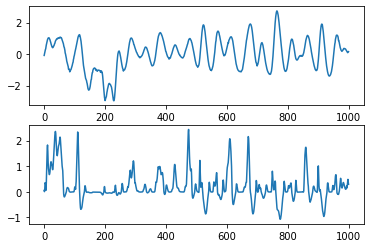

In [35]:
####################
# evaluation
###################
import matplotlib.pyplot as plt
ppgsignal=sio.loadmat('./noisydata/1-25-94.7368.mat')
ppgsignal=ppgsignal['ppgseg']
ppgsignal=ppgsignal[0]
plt.subplot(211)
plt.plot(ppgsignal)
print('before denoise bpm:{}'.format(calucate_hr(ppgsignal)))
noisysignal=np.reshape(ppgsignal,(1,1,1000))
print(noisysignal.shape)
noisydata=t.from_numpy(noisysignal).to(device)
# noisydata.to(device)
genesignal=NetG(noisydata).detach()
genesignal=genesignal.cpu().numpy()
plt.subplot(212)
plt.plot(genesignal[0][0])
print('after denoise bpm:{}'.format(calucate_hr(genesignal[0][0])))


In [12]:
a[1:5,:]

array([[0.76819133],
       [0.69786248],
       [0.36120186],
       [0.18353834]])